# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [40]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

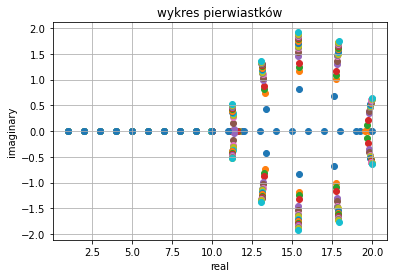

In [56]:
W = np.arange(1,21,1)
W_A = main.polly_A(W)
W_iter , roots_iter = main.roots_20(W_A)
for i in range(20):
    W_iter , roots_iter = main.roots_20(W_iter)
    plt.scatter(np.real(roots_iter),np.imag(roots_iter))
plt.scatter(np.real(W),np.imag(W))
plt.xlabel("real")
plt.ylabel("imaginary")
plt.title("wykres pierwiastków")
plt.grid()
plt.show()

## zaproponowany sposób oszacowania:
Oszacowanie uwarunkowania każdego z pierwiastków można otrzymać kożystając ze wzoru $$cond(f,d) = \cfrac{||f(d+\Delta d)-f(d)||}{||f(\Delta d)||}*\cfrac{||d||}{||\Delta d||}$$
gdzie $f$ to funkcja a $d$ to lista argumentów funkcji.
w tym przypadku dla wielomianu wilkinsona zaburzena z zadania będą obecne u wszystkich argumentów funkcji a wyjściem danej funkcji $f$ będzie dany pierwiastek.

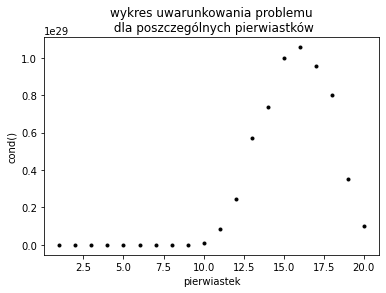

In [61]:
W = np.arange(1,21,1)
d = main.polly_A(W)
delta_d = np.random.random_sample(size = len(d)) * 10**-10
f = P.polyroots
#cond:
cond = np.array([np.linalg.norm(f(d+delta_d)[i]-f(d)[i])*abs(np.linalg.norm(d))/(np.linalg.norm(f(delta_d)[i])*np.linalg.norm(delta_d)) for i in range(20)])
plt.title("wykres uwarunkowania problemu\n dla poszczególnych pierwiastków")
plt.plot(W , cond , ".k")
plt.xlabel("pierwiastek")
plt.ylabel("cond()")
plt.show()

## wnioski:
jak widać na załączonym wykresie dla wielomianu Wilkinsa uwarunkowanie jest bardzo wysokie dla pierwiastków z zakresu $[11,20]$ gdzie maksimum uwarunkowania pierwiastki osiągają w połowie tego przedziału.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.


 pierwiastki wyliczone z funkcji eigvals
[1.01748261+0.00732488j 1.01748261-0.00732488j 1.00704099+0.01748199j
 1.00704099-0.01748199j 0.99267659+0.01719963j 0.99267659-0.01719963j
 0.9827998 +0.00704241j 0.9827998 -0.00704241j]

 pierwiastki z rozkładu shura
[1.01899413+0.00797198j 1.00765421+0.01900849j 0.99203069+0.01871632j
 1.01900861-0.00793463j 0.98126571+0.00765683j 0.98128364-0.00769762j
 1.00769153-0.01899061j 0.99207147-0.01873074j]

 pierwiastki z funkcji polyroots
[0.98459407+0.j         0.98913287-0.01090859j 0.98913287+0.01090859j
 1.00005143-0.01536883j 1.00005143+0.01536883j 1.01086771-0.01080515j
 1.01086771+0.01080515j 1.0153019 +0.j        ]


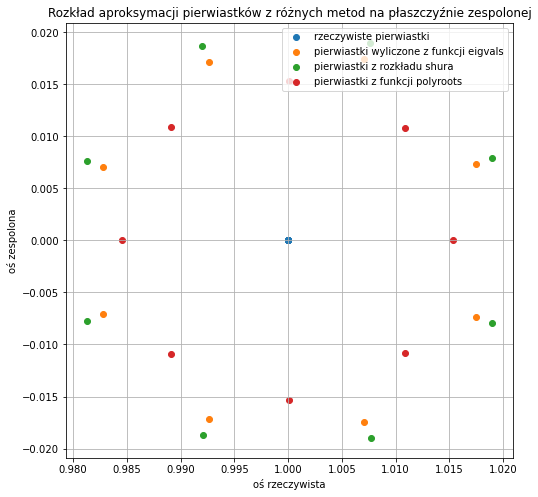

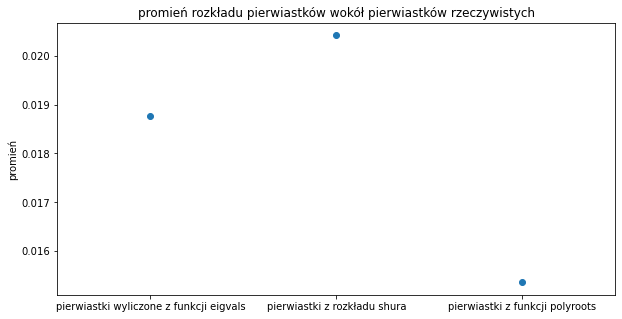

In [ ]:
w1 = np.array([1 for i in range(8)])
w1_A = main.polly_A(w1)
w1_frob = main.frob_a_vol2(w1_A)
print("\n pierwiastki wyliczone z funkcji eigvals")
print(w1_frob[1])
print("\n pierwiastki z rozkładu shura")
print(w1_frob[2])
print("\n pierwiastki z funkcji polyroots")
print(w1_frob[3])
plt.figure(figsize=[8,8])
plt.scatter(np.real(w1),np.imag(w1), label = "rzeczywiste pierwiastki")
labels = ["pierwiastki wyliczone z funkcji eigvals","pierwiastki z rozkładu shura","pierwiastki z funkcji polyroots"]
for i in range(1,4):
    plt.scatter(np.real(w1_frob[i]),np.imag(w1_frob[i]), label = labels[i-1])
plt.legend(loc = 1)
plt.xlabel("oś rzeczywista")
plt.ylabel("oś zespolona")
plt.title("Rozkład aproksymacji pierwiastków z różnych metod na płaszczyźnie zespolonej")
plt.grid()
plt.show()
plt.figure(figsize= [10,5])
w1_roots_err = abs(np.array(w1_frob[1:4]) - 1)
w1_roots_err_mean = np.array([np.mean(w1_roots_err[0]),np.mean(w1_roots_err[1]),np.mean(w1_roots_err[2])])
plt.scatter([0.5, 1 , 1.5], w1_roots_err_mean)
plt.xlim([0.25,1.75])
plt.title("promień rozkładu pierwiastków wokół pierwiastków rzeczywistych")
plt.ylabel("promień")
plt.xticks([0.5, 1 , 1.5],labels)
plt.show()

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.



 pierwiastki wyliczone z funkcji eigvals
[ 4.25853423e-16+1.41421356e+00j  4.25853423e-16-1.41421356e+00j
 -3.33333333e-01+0.00000000e+00j  6.66673017e-01+0.00000000e+00j
  6.66663491e-01+5.49994369e-06j  6.66663491e-01-5.49994369e-06j
  3.33333333e-01+0.00000000e+00j]

 pierwiastki z rozkładu shura
[ 1.11022302e-15+1.41421356e+00j  8.32667268e-16-1.41421356e+00j
 -3.33333333e-01-1.89658810e-18j  6.66663330e-01-6.12292694e-06j
  6.66663033e-01+5.95134014e-06j  6.66673638e-01+1.71586797e-07j
  3.33333333e-01+0.00000000e+00j]

 pierwiastki z funkcji polyroots
[-3.33333333e-01+0.00000000e+00j -9.02993797e-16-1.41421356e+00j
 -9.02993797e-16+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66664545e-01-3.67469409e-06j  6.66664545e-01+3.67469409e-06j
  6.66670910e-01+0.00000000e+00j]


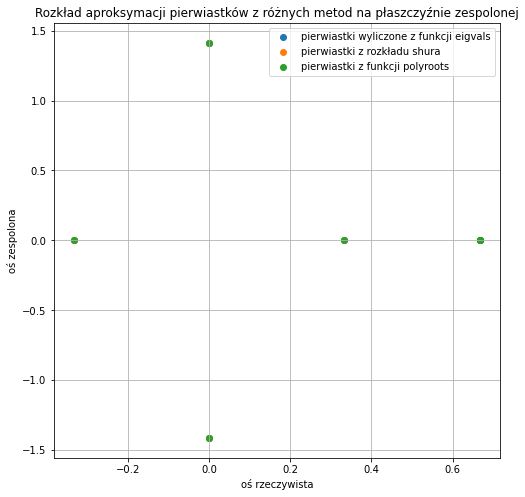

In [ ]:

w1_A = np.array([243,-486,783,-990,558,-28,-72,16])
w1_frob = main.frob_a_vol2(w1_A)
print("\n pierwiastki wyliczone z funkcji eigvals")
print(w1_frob[1])
print("\n pierwiastki z rozkładu shura")
print(w1_frob[2])
print("\n pierwiastki z funkcji polyroots")
print(w1_frob[3])
plt.figure(figsize=[8,8])
labels = ["pierwiastki wyliczone z funkcji eigvals","pierwiastki z rozkładu shura","pierwiastki z funkcji polyroots"]
for i in range(1,4):
    plt.scatter(np.real(w1_frob[i]),np.imag(w1_frob[i]), label = labels[i-1])
    
plt.legend(loc = 1)
plt.xlabel("oś rzeczywista")
plt.ylabel("oś zespolona")
plt.title("Rozkład aproksymacji pierwiastków z różnych metod na płaszczyźnie zespolonej")
plt.grid()
plt.show()

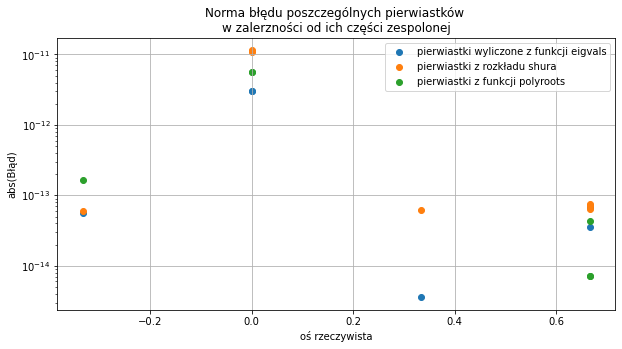

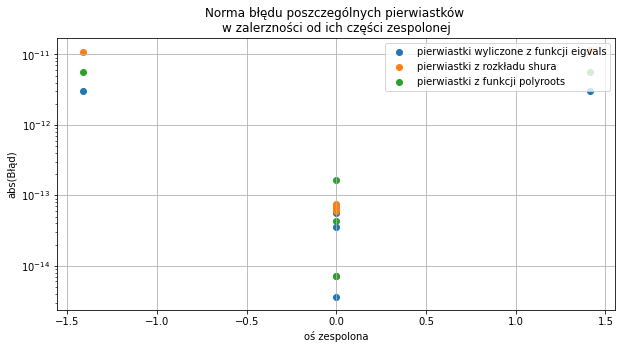

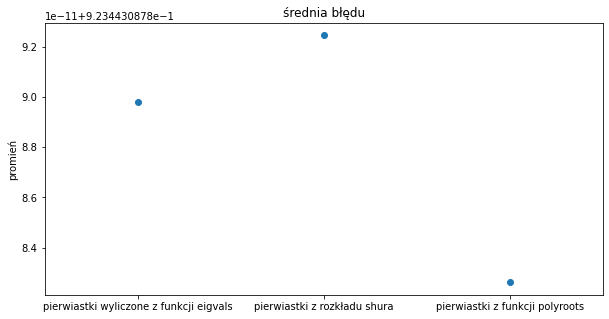

In [ ]:
f = lambda x : 243*x**7-486*x**6+783*x**5-990*x**4+558*x**3-28*x**2-72*x+16
plt.figure(figsize= [10,5])
for i in range(1,4):
    plt.scatter(np.real(w1_frob[i]),abs(f(w1_frob[i])),label = labels[i-1])
plt.legend(loc = 1)
plt.xlabel("oś rzeczywista")
plt.ylabel("abs(Błąd)")
plt.title("Norma błędu poszczególnych pierwiastków \nw zalerzności od ich części zespolonej")
plt.yscale("log")
plt.grid()
plt.show()
plt.figure(figsize= [10,5])
for i in range(1,4):
    plt.scatter(np.imag(w1_frob[i]),abs(f(w1_frob[i])),label = labels[i-1])
plt.legend(loc = 1)
plt.xlabel("oś zespolona")
plt.ylabel("abs(Błąd)")
plt.title("Norma błędu poszczególnych pierwiastków \nw zalerzności od ich części zespolonej")
plt.yscale("log")
plt.grid()
plt.show()
w1_roots_err = abs(np.array(w1_frob[1:4]) - 1)
w1_roots_err_mean = np.array([np.mean(w1_roots_err[0]),np.mean(w1_roots_err[1]),np.mean(w1_roots_err[2])])
plt.figure(figsize= [10,5])
w1_roots_err = abs(np.array(w1_frob[1:4]) - 1)
w1_roots_err_mean = np.array([np.mean(w1_roots_err[0]),np.mean(w1_roots_err[1]),np.mean(w1_roots_err[2])])
plt.scatter([0.5, 1 , 1.5], w1_roots_err_mean)
plt.xlim([0.25,1.75])
plt.title("średnia błędu")
plt.ylabel("promień")
plt.xticks([0.5, 1 , 1.5],labels)
plt.show()

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [ ]:
cheb_roots = np.polynomial.chebyshev.chebroots([-351,7/8,351,-15/16,-39/2,1/16])
print(cheb_roots)

[ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]


In [ ]:
w1_A = np.array([1, -156, -5, 780, 4, -624])
w1_frob = main.frob_a_vol2(w1_A)
print("\n pierwiastki wyliczone z funkcji eigvals")
print(w1_frob[1])
print("\n pierwiastki z rozkładu shura")
print(w1_frob[2])
print("\n pierwiastki z funkcji polyroots")
print(w1_frob[3])
labels = ["pierwiastki wyliczone z funkcji eigvals","pierwiastki z rozkładu shura","pierwiastki z funkcji polyroots"]



 pierwiastki wyliczone z funkcji eigvals
[156.  -2.  -1.   2.   1.]

 pierwiastki z rozkładu shura
[156.+0.j  -2.+0.j  -1.+0.j   2.+0.j   1.+0.j]

 pierwiastki z funkcji polyroots
[ -2.  -1.   1.   2. 156.]


## Wnioski
laboratoria przeszły bezproblemowo poza testami do funkcji frob_a które były błędne (w testach nawet macierz frobeniusa była tam źle zdefiniowana) dlatego napisałem funkcje frob_a która przechodzi testy oraz funkcję frob_a_vol2 która jest poprawna i wykorzystuję ją w pliku ze sprawozdaniem. metody polyroots, wartości własne macierzy frobeniusa oraz rozkład macierzy frobeniusa na postać schura mają bardzo zbliżone błędy rzędu $10^{-11}$. funkcja polyroots jest trochę lepsza niż pozostałe metody w następnej kolejności pod względem poprawności jest funkcja licząca wartości własne bezpośrednio z macirzy frobeniusa. jeżeli chodzi o metodę wykożystującą rozkład na szereg czebyszewa nie do końca wiem czy dobrze policzyłem współczynniki przy odpowiednich wektorach (wielomianach) z bazy czebyszewa. myślę że poznane metody przydadzą mi się w przyszłości gdyż rozwiązywanie równań wielomianowych oraz poszukiwanie wartości własnych macierzy jest istotnym narzędziem w dziedzinie algebry liniowej. istotną kwestią jest także liczenie uwarunkowania probemu co pozwala na lepsze oszacowanie błędów numerycznych(zad 1).